In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import seaborn as sns

import pandas as pd

df = pd.read_csv(r'C:\Users\rudra\OneDrive\Desktop\911Project\911.csv')
print(df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & 

In [61]:
def top_zipcodes():
    a = df['zip'].value_counts().head(10)
    print("Top 10 Zipcodes for 911 calls are: \n",a)
    print()
    print()


def zip_check():
    b = set(['19446','19090']).issubset(set(df['zip']))
    print("Are Zipcodes 19446 and 19090 present?",b)
 
    
    

In [43]:
##check for specific townships and top townships for 911 calls

def top_townships():
    c = df['twp'].value_counts().head(4)
    print("Top 4 Townships for 911 calls: \n", c)
    township_check = ['LOWER POTTSGROVE', 'NORRISTOWN', 'HORSHAM', 'ABINGTON']
    present_townships = set(township_check).intersection(set(df['twp']))
    print("Townships not present:", set(township_check) - present_townships)
   

In [44]:
##Common Reasons

def common_reasons():
    df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
    common_reasons = df['Reason'].value_counts()
    print(common_reasons)
    common_reasons.plot(kind='bar')
    plt.xlabel('Reason')
    plt.ylabel('Number of Calls')
    plt.title('911 Calls by Reason')
  
    return plt.show()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64


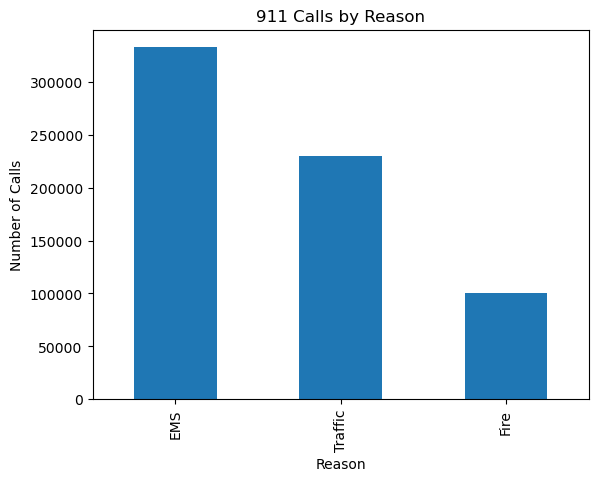

In [45]:
common_reasons()

In [46]:
##Highest no of EMS calls

def highest_calls():
    df['DayOfWeek'] = pd.to_datetime(df['timeStamp']).dt.day_name()
    ems_calls = df[df['Reason'] == 'EMS']['DayOfWeek'].value_counts()
    print(ems_calls)
  


In [57]:
###Countplot of Calls by Day and Reason:
def reason():
    sns.countplot(data=df, x='DayOfWeek', hue='Reason')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Calls')
    plt.title('911 Calls by Day of the Week and Reason')
    return plt.show()


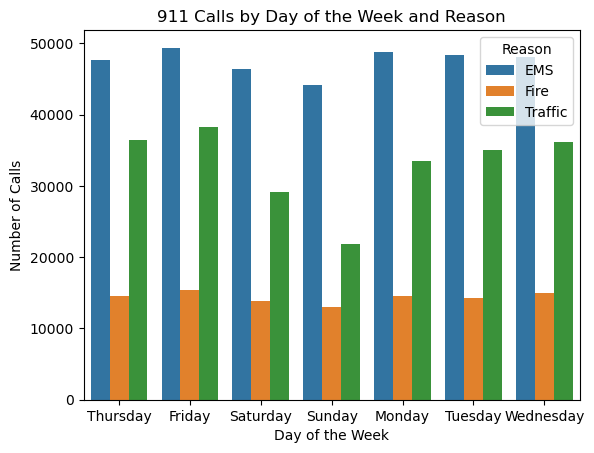

In [59]:
reason()

In [53]:
##monthly analysis of firerelated calls

def month_analysis():
    df['Month'] = pd.to_datetime(df['timeStamp']).dt.month
    fire_calls = df[df['Reason'] == 'Fire']['Month'].value_counts()
    print(fire_calls)
   
    


In [ ]:
###Mapping Traffic Calls

def mapping_visual():
    traffic_calls = df[df['Reason'] == 'Traffic']
    map = folium.Map(location=[traffic_calls['lat'].mean(), traffic_calls['lng'].mean()], zoom_start=13)

    for index, row in traffic_calls.iterrows():
        folium.Marker([row['lat'], row['lng']], popup=row['desc']).add_to(map)

   

    map.save('traffic_calls_map.html')
    


Top 10 Zipcodes for 911 calls are 
 zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
19002.0    21070
19468.0    18939
19046.0    17886
19454.0    17661
19090.0    17377
Name: count, dtype: int64


Are Zipcodes 19446 and 19090 present? False


Top 4 Townships for 911 calls: 
 twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
Name: count, dtype: int64
Townships not present: set()


Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64


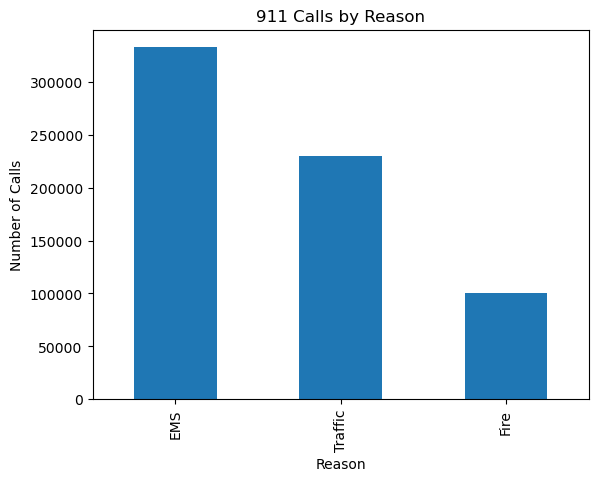



DayOfWeek
Friday       49368
Monday       48750
Tuesday      48371
Wednesday    48039
Thursday     47620
Saturday     46436
Sunday       44108
Name: count, dtype: int64




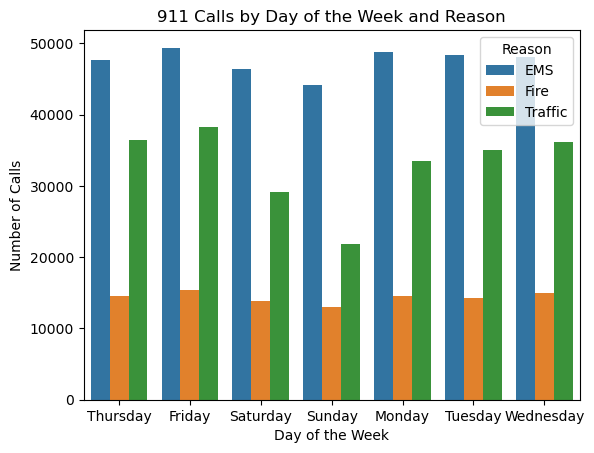



Month
6     9879
7     9665
3     9135
1     9087
5     8691
4     8132
2     8092
12    8052
10    7683
8     7598
11    7350
9     7258
Name: count, dtype: int64




In [71]:
top_zipcodes() 
print()
print()
zip_check()
print()
print()

top_townships()
print()
print()

common_reasons()
print()
print()

highest_calls()
print()
print()

reason()
print()
print()

month_analysis()
print()
print()
# mapping_visual()